In [14]:
from music21 import *
s = corpus.parse('bwv66.6')

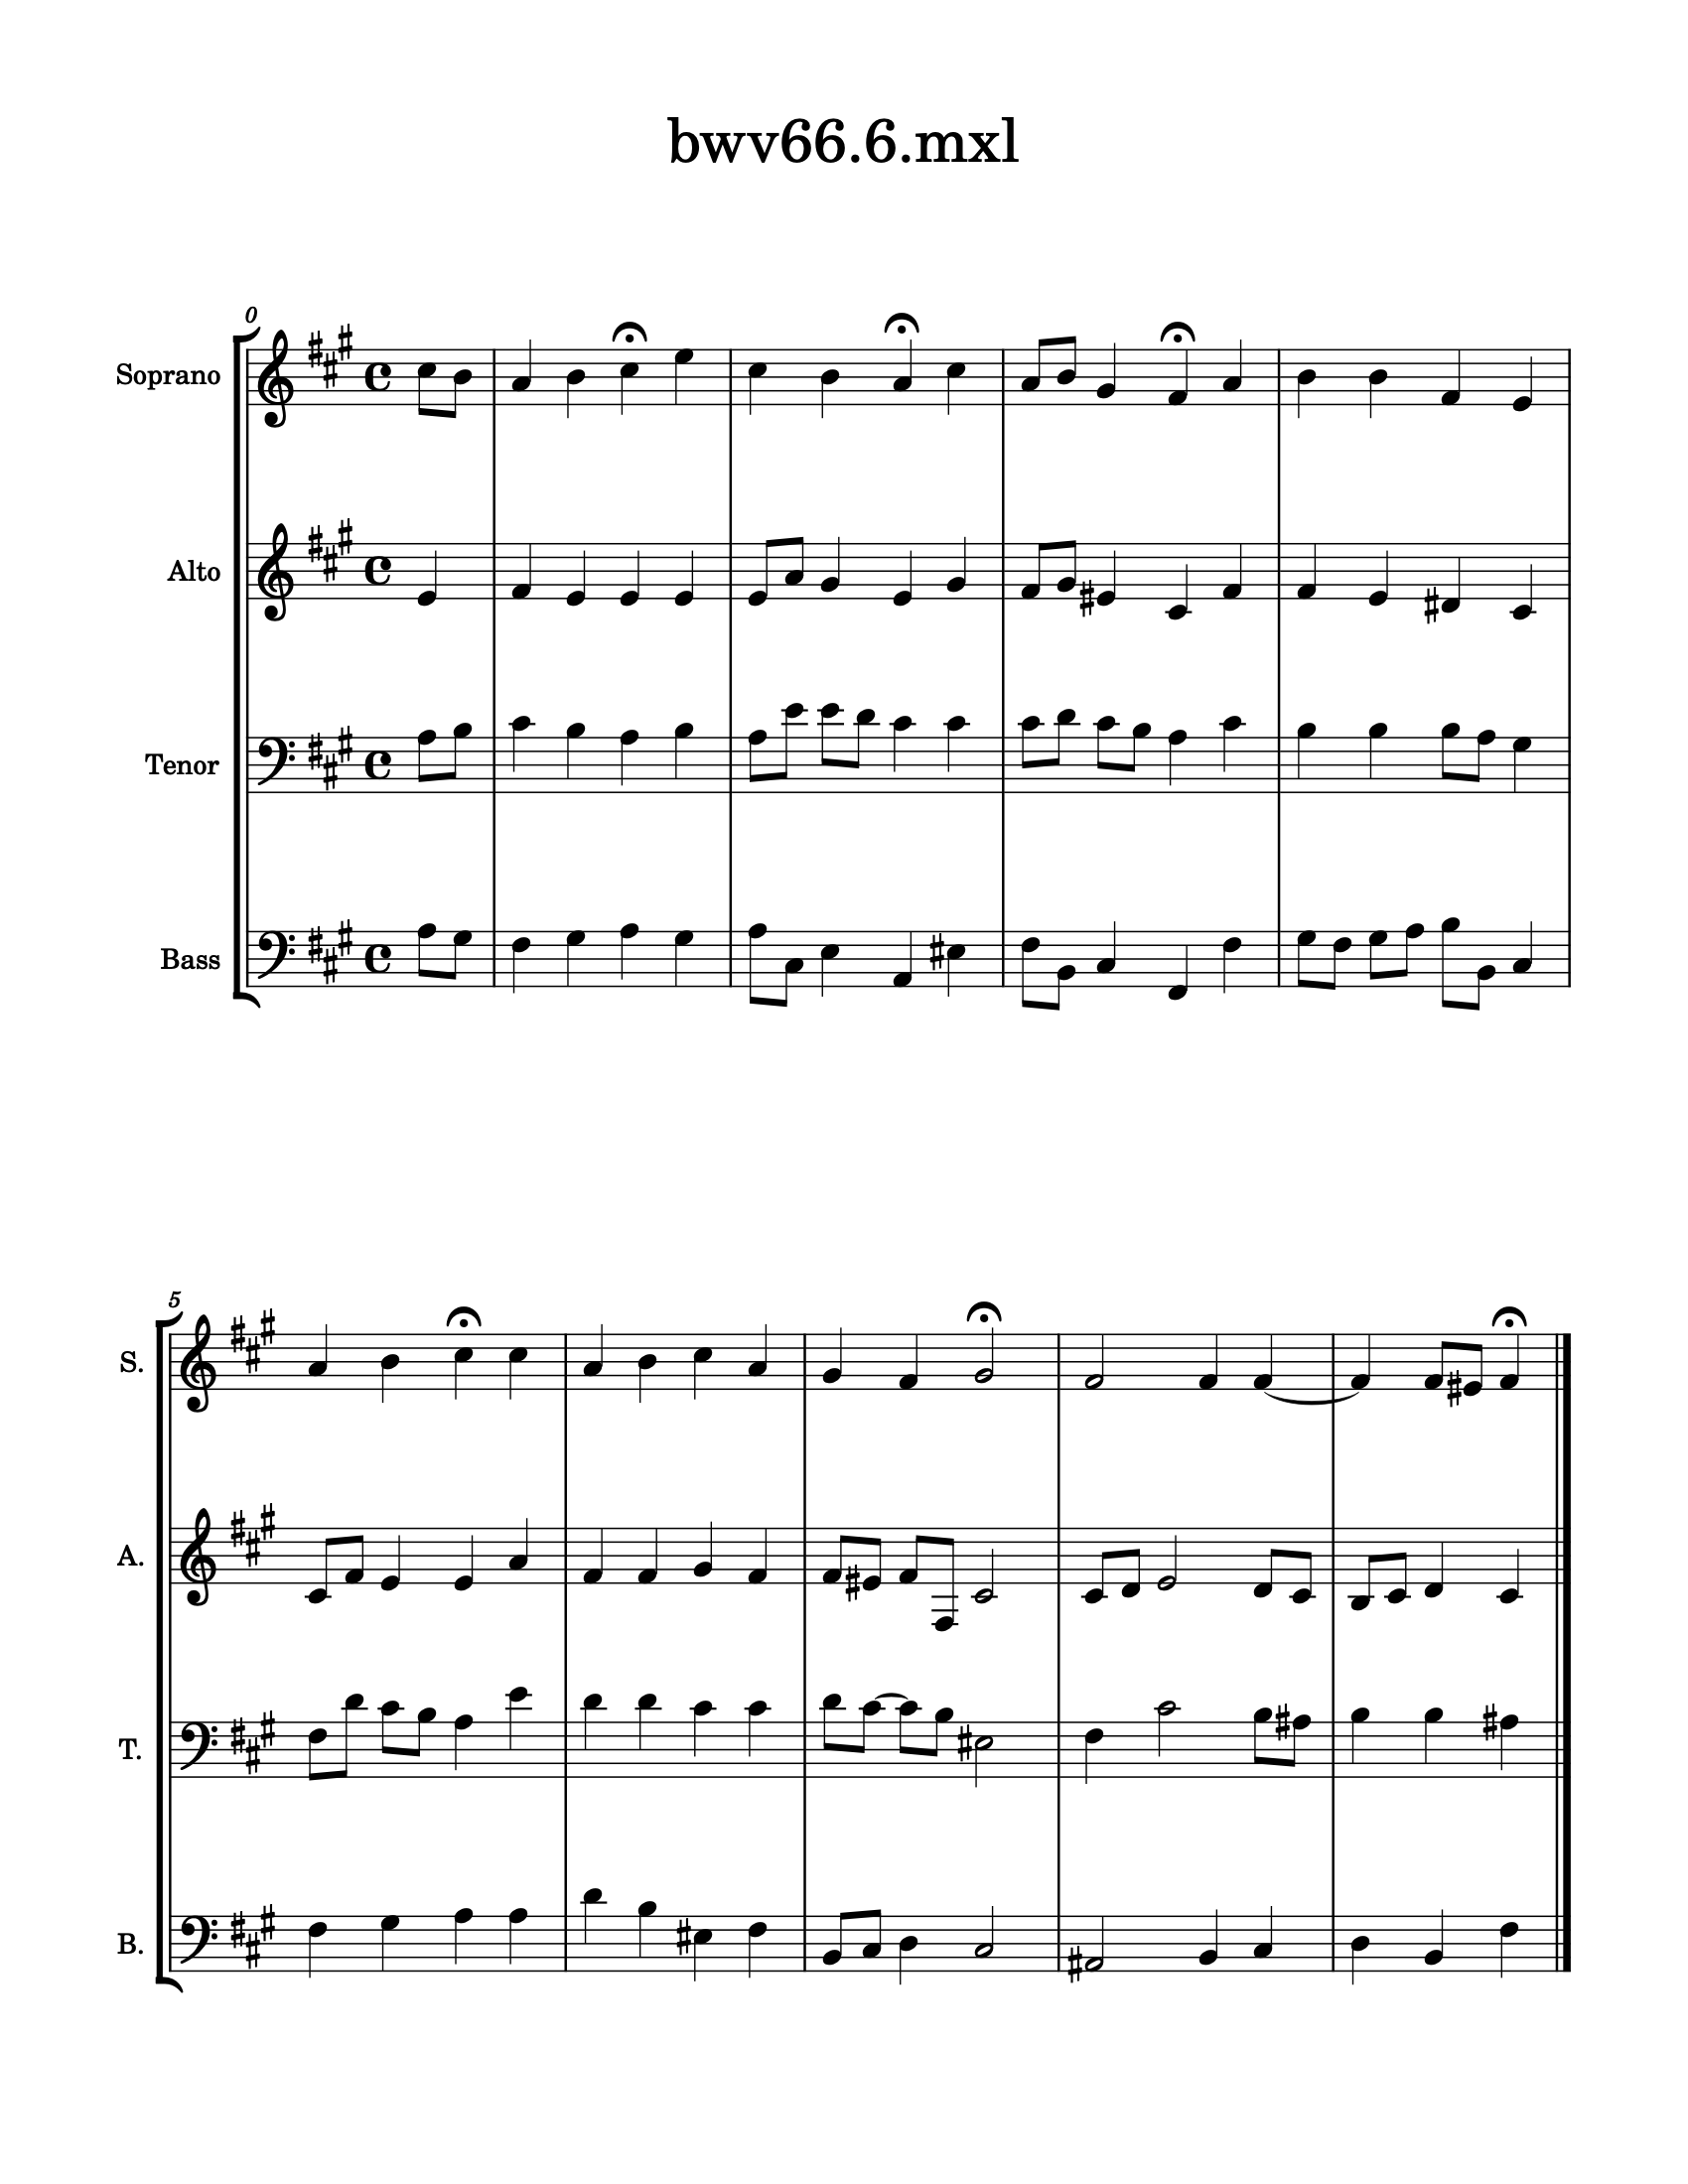

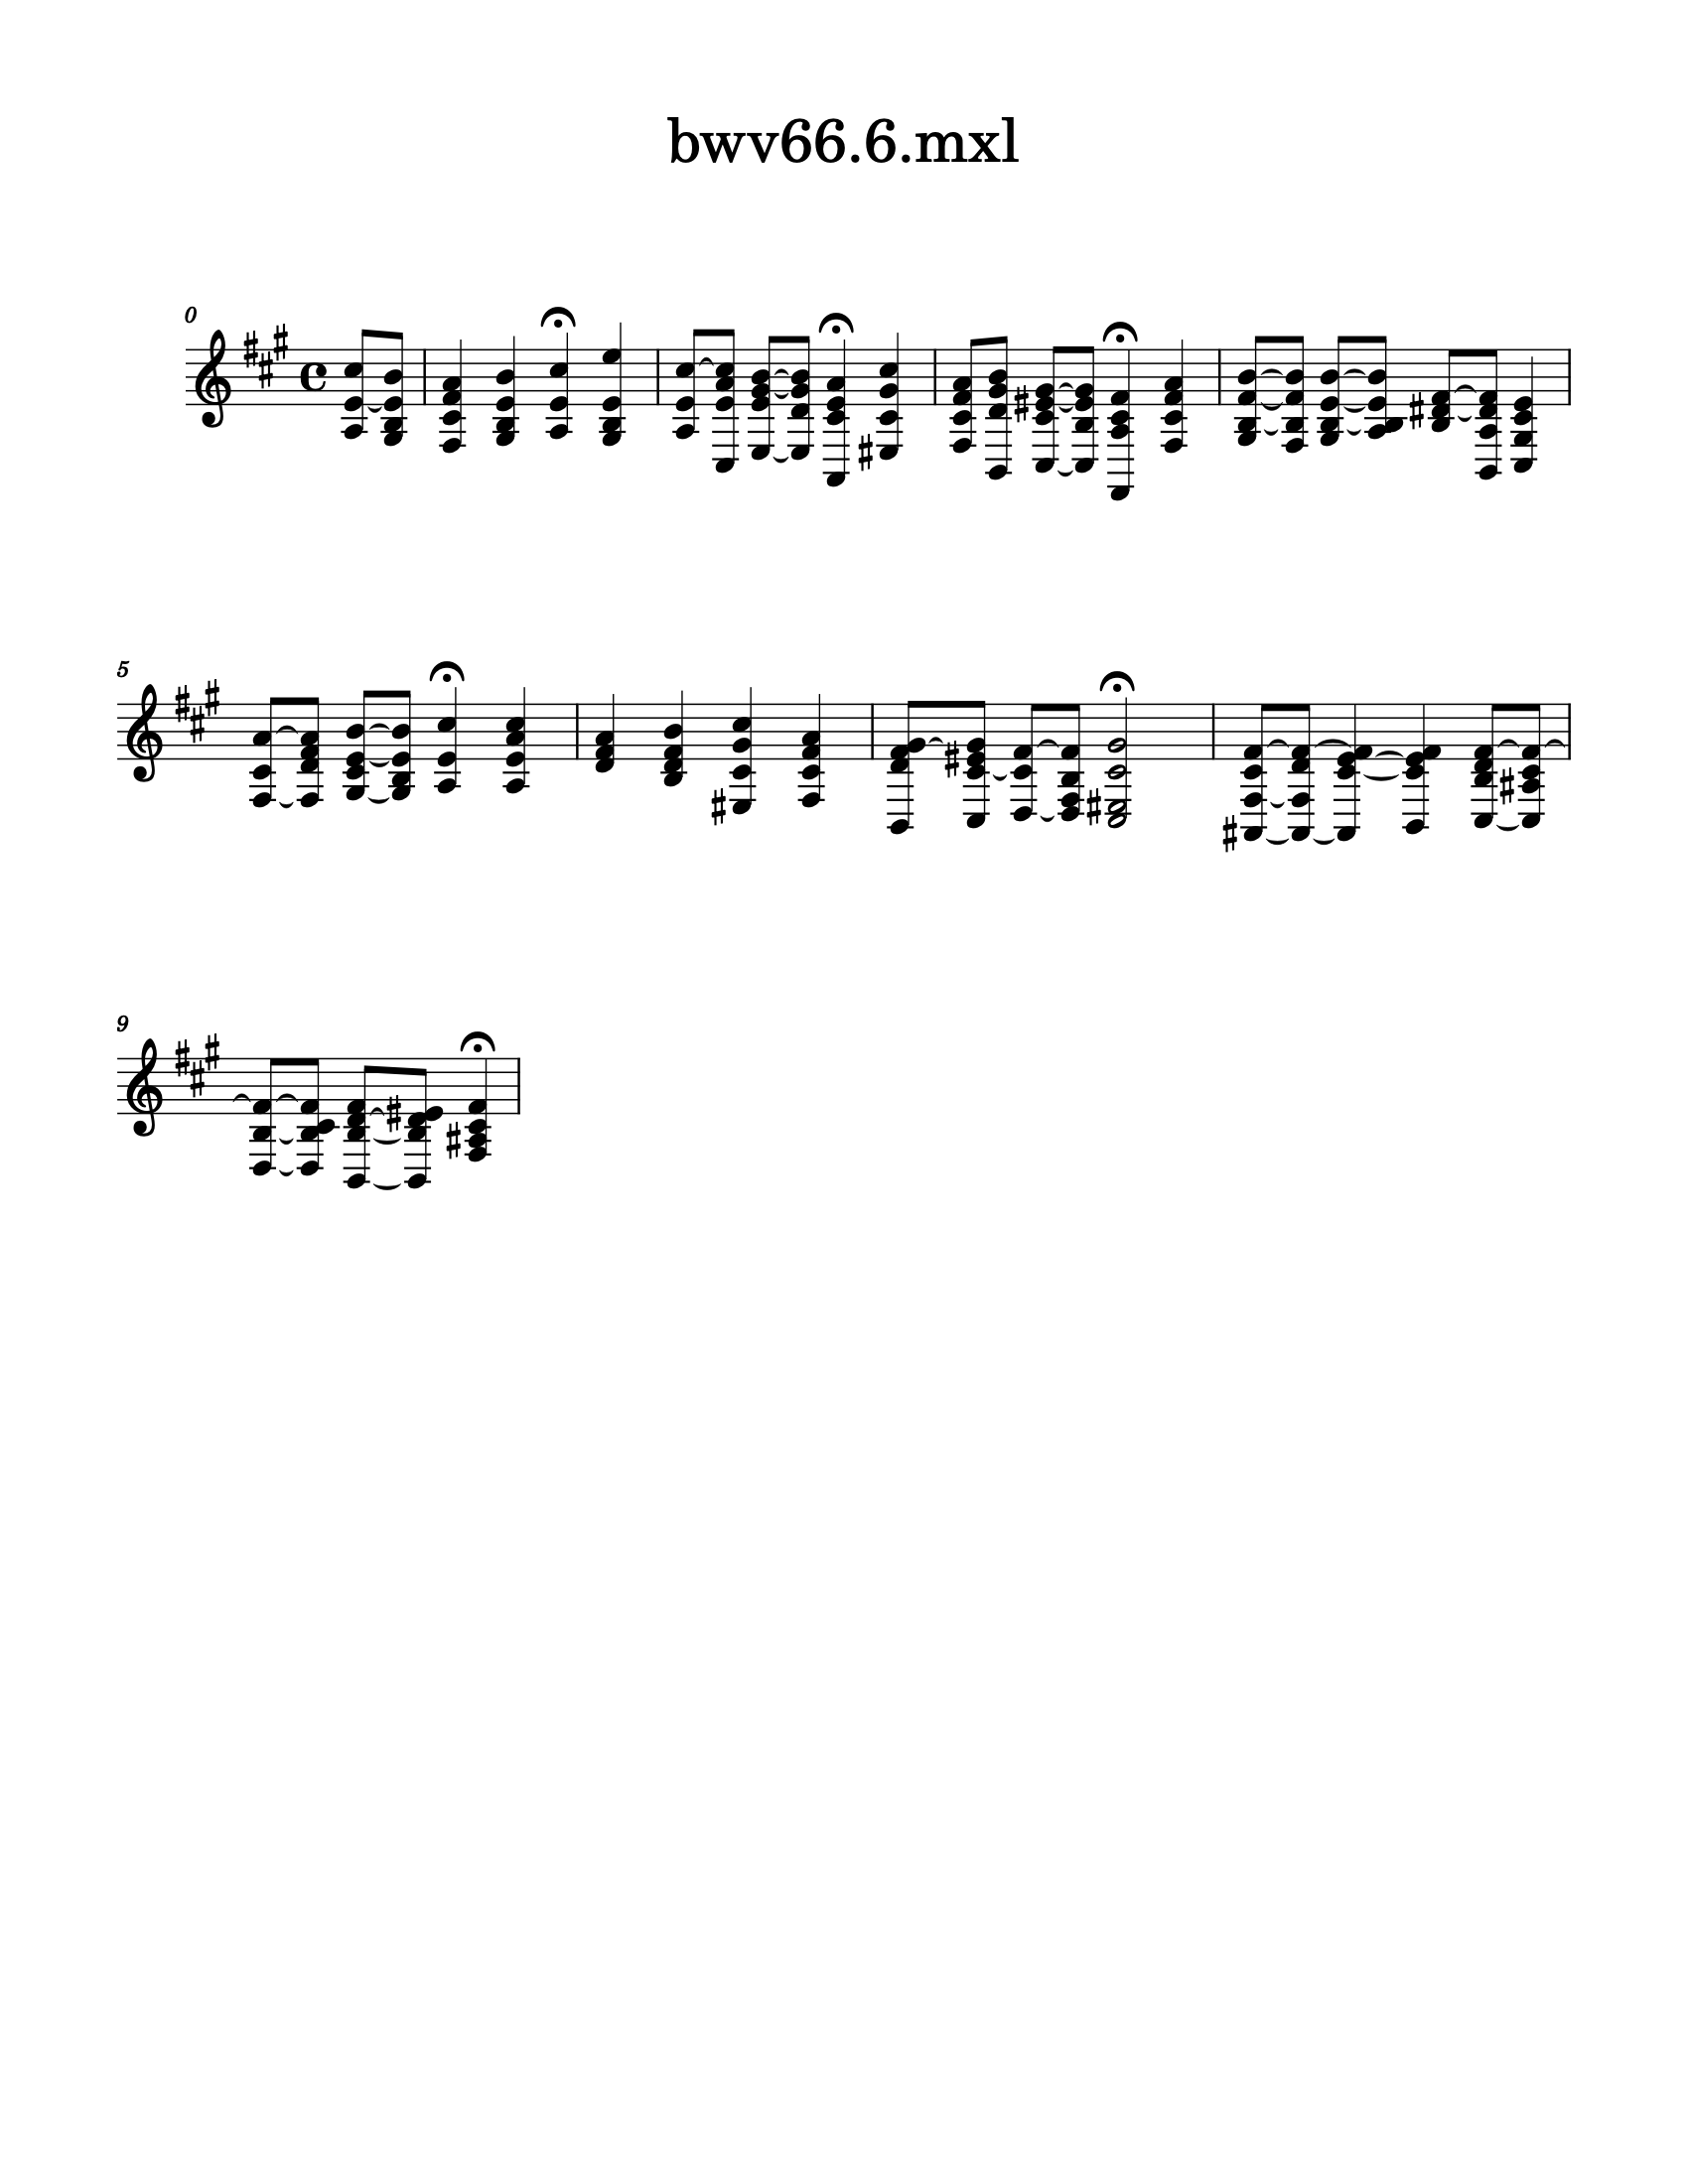

In [24]:
s.show()
sChords = s.chordify()
sChords.show()

12
<music21.stream.Part Soprano>
<music21.stream.Part Soprano_flat>
59


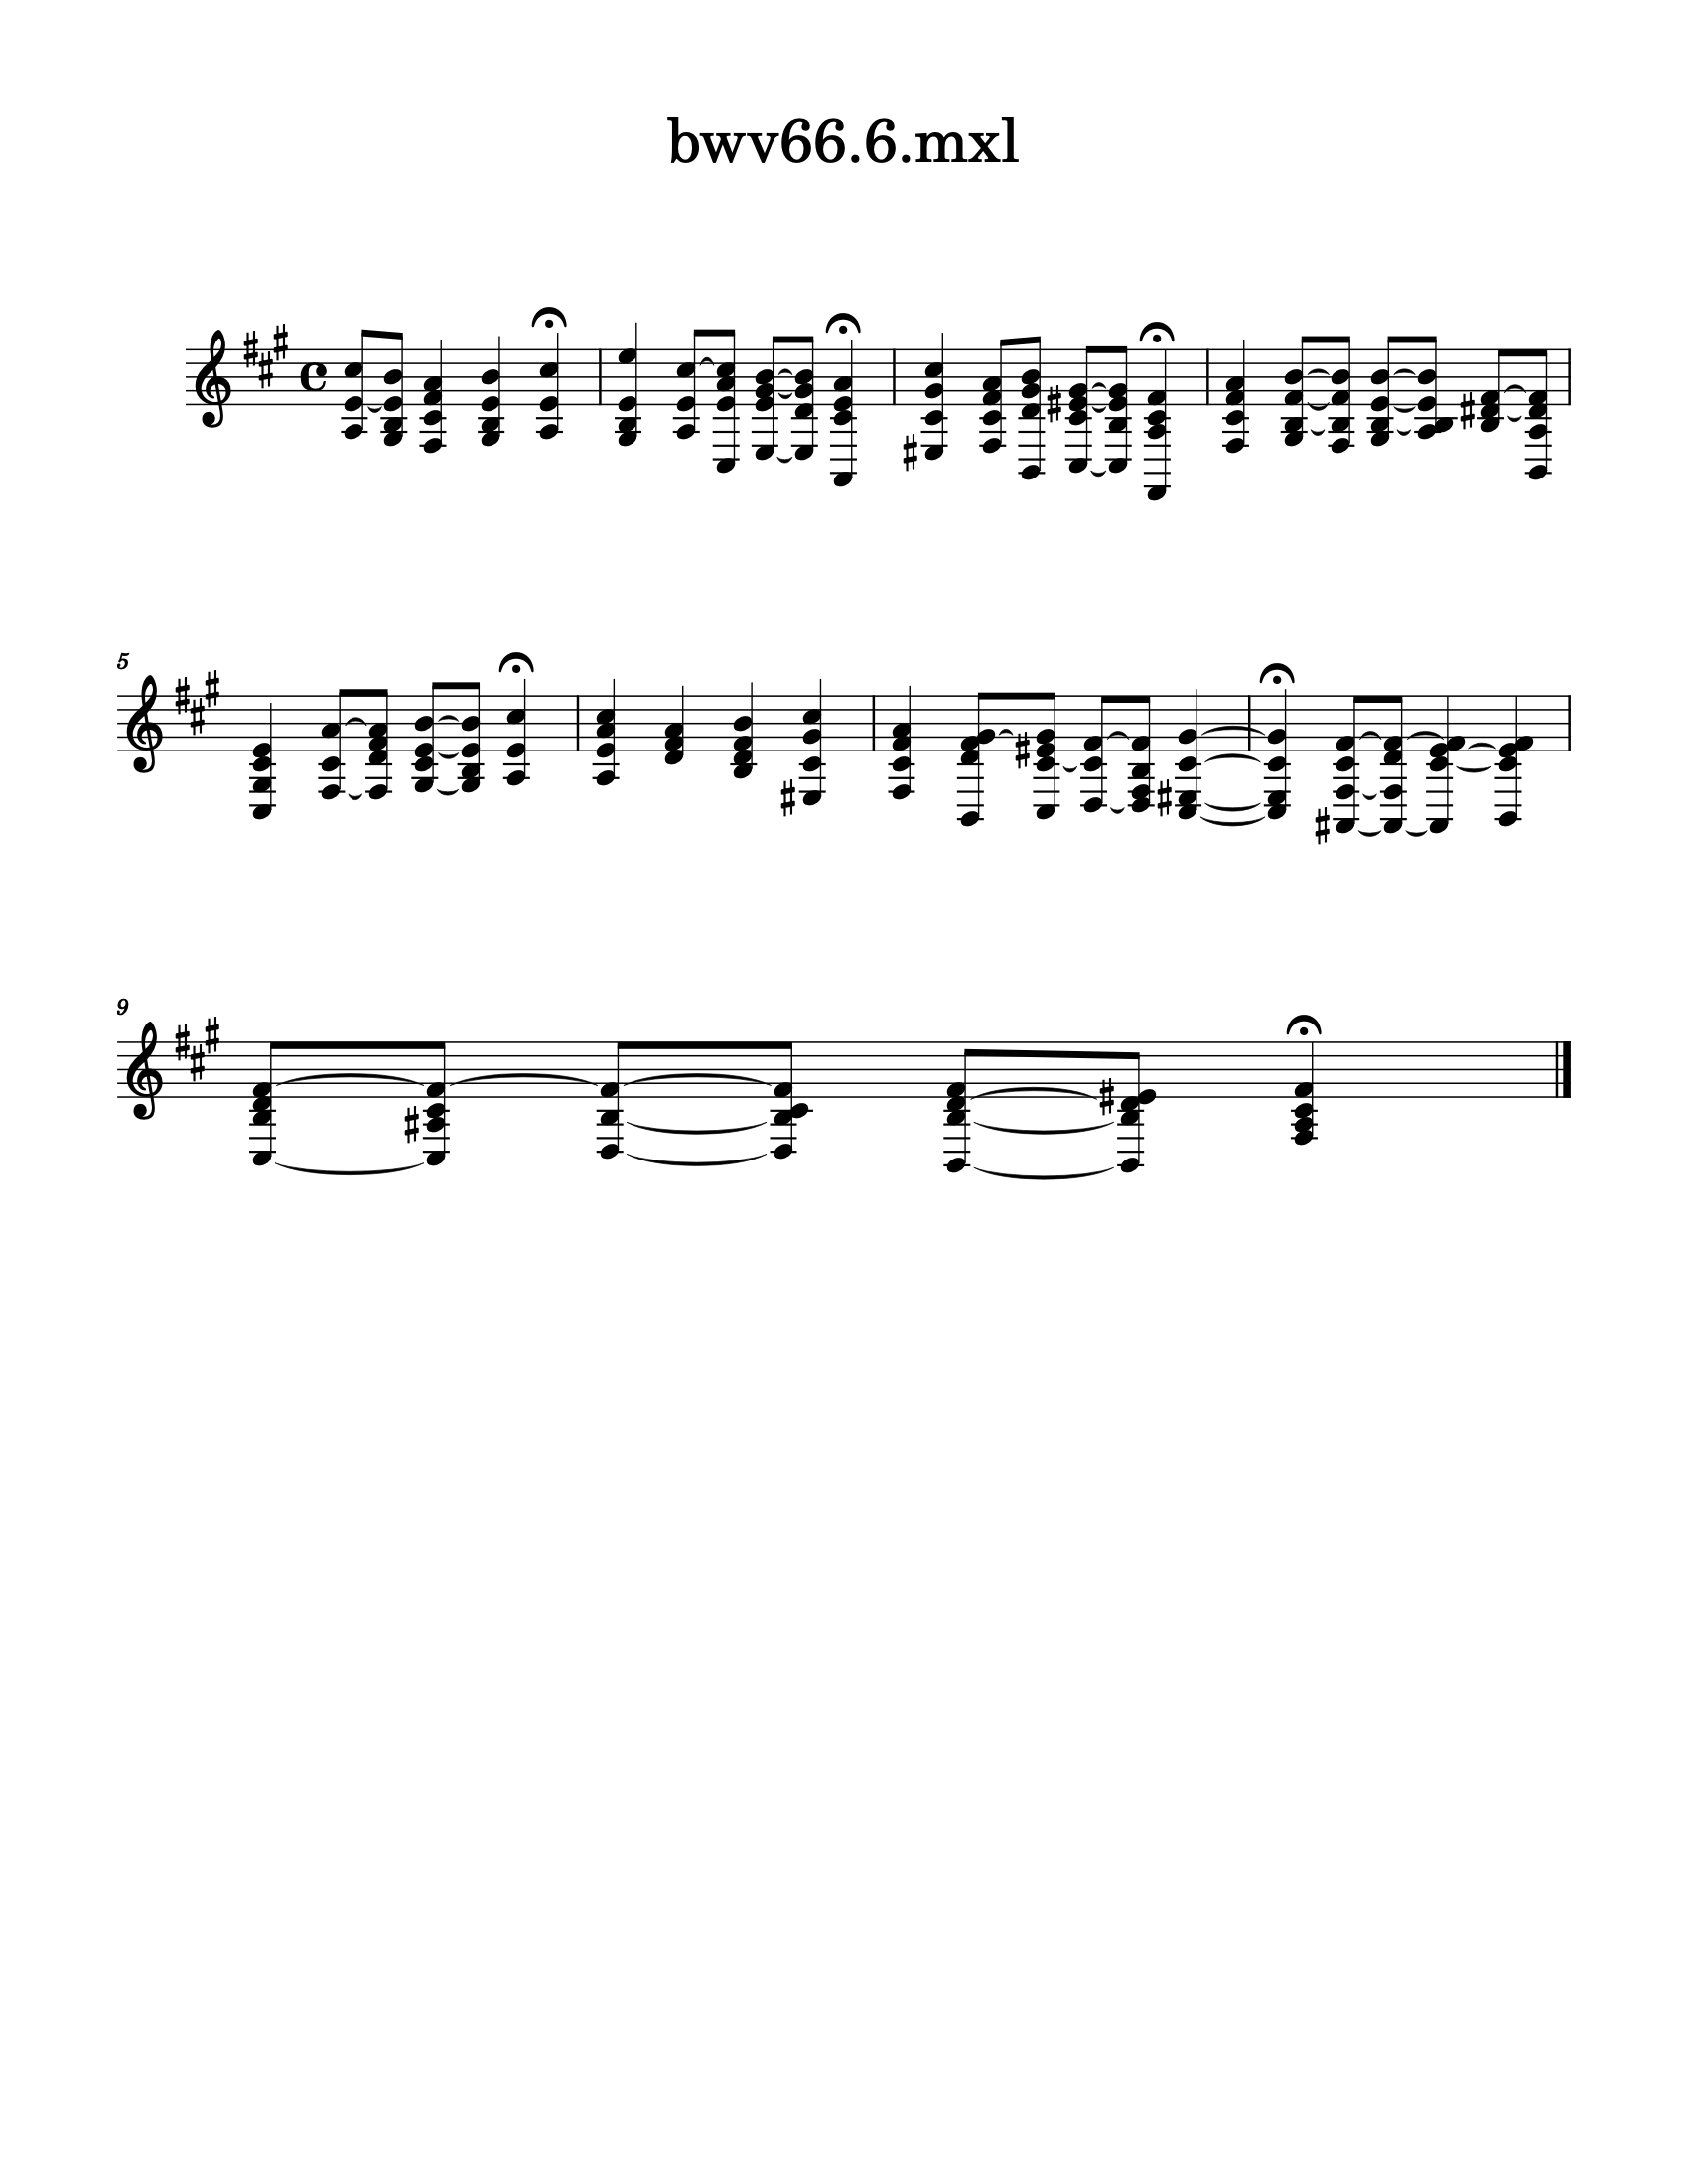

51


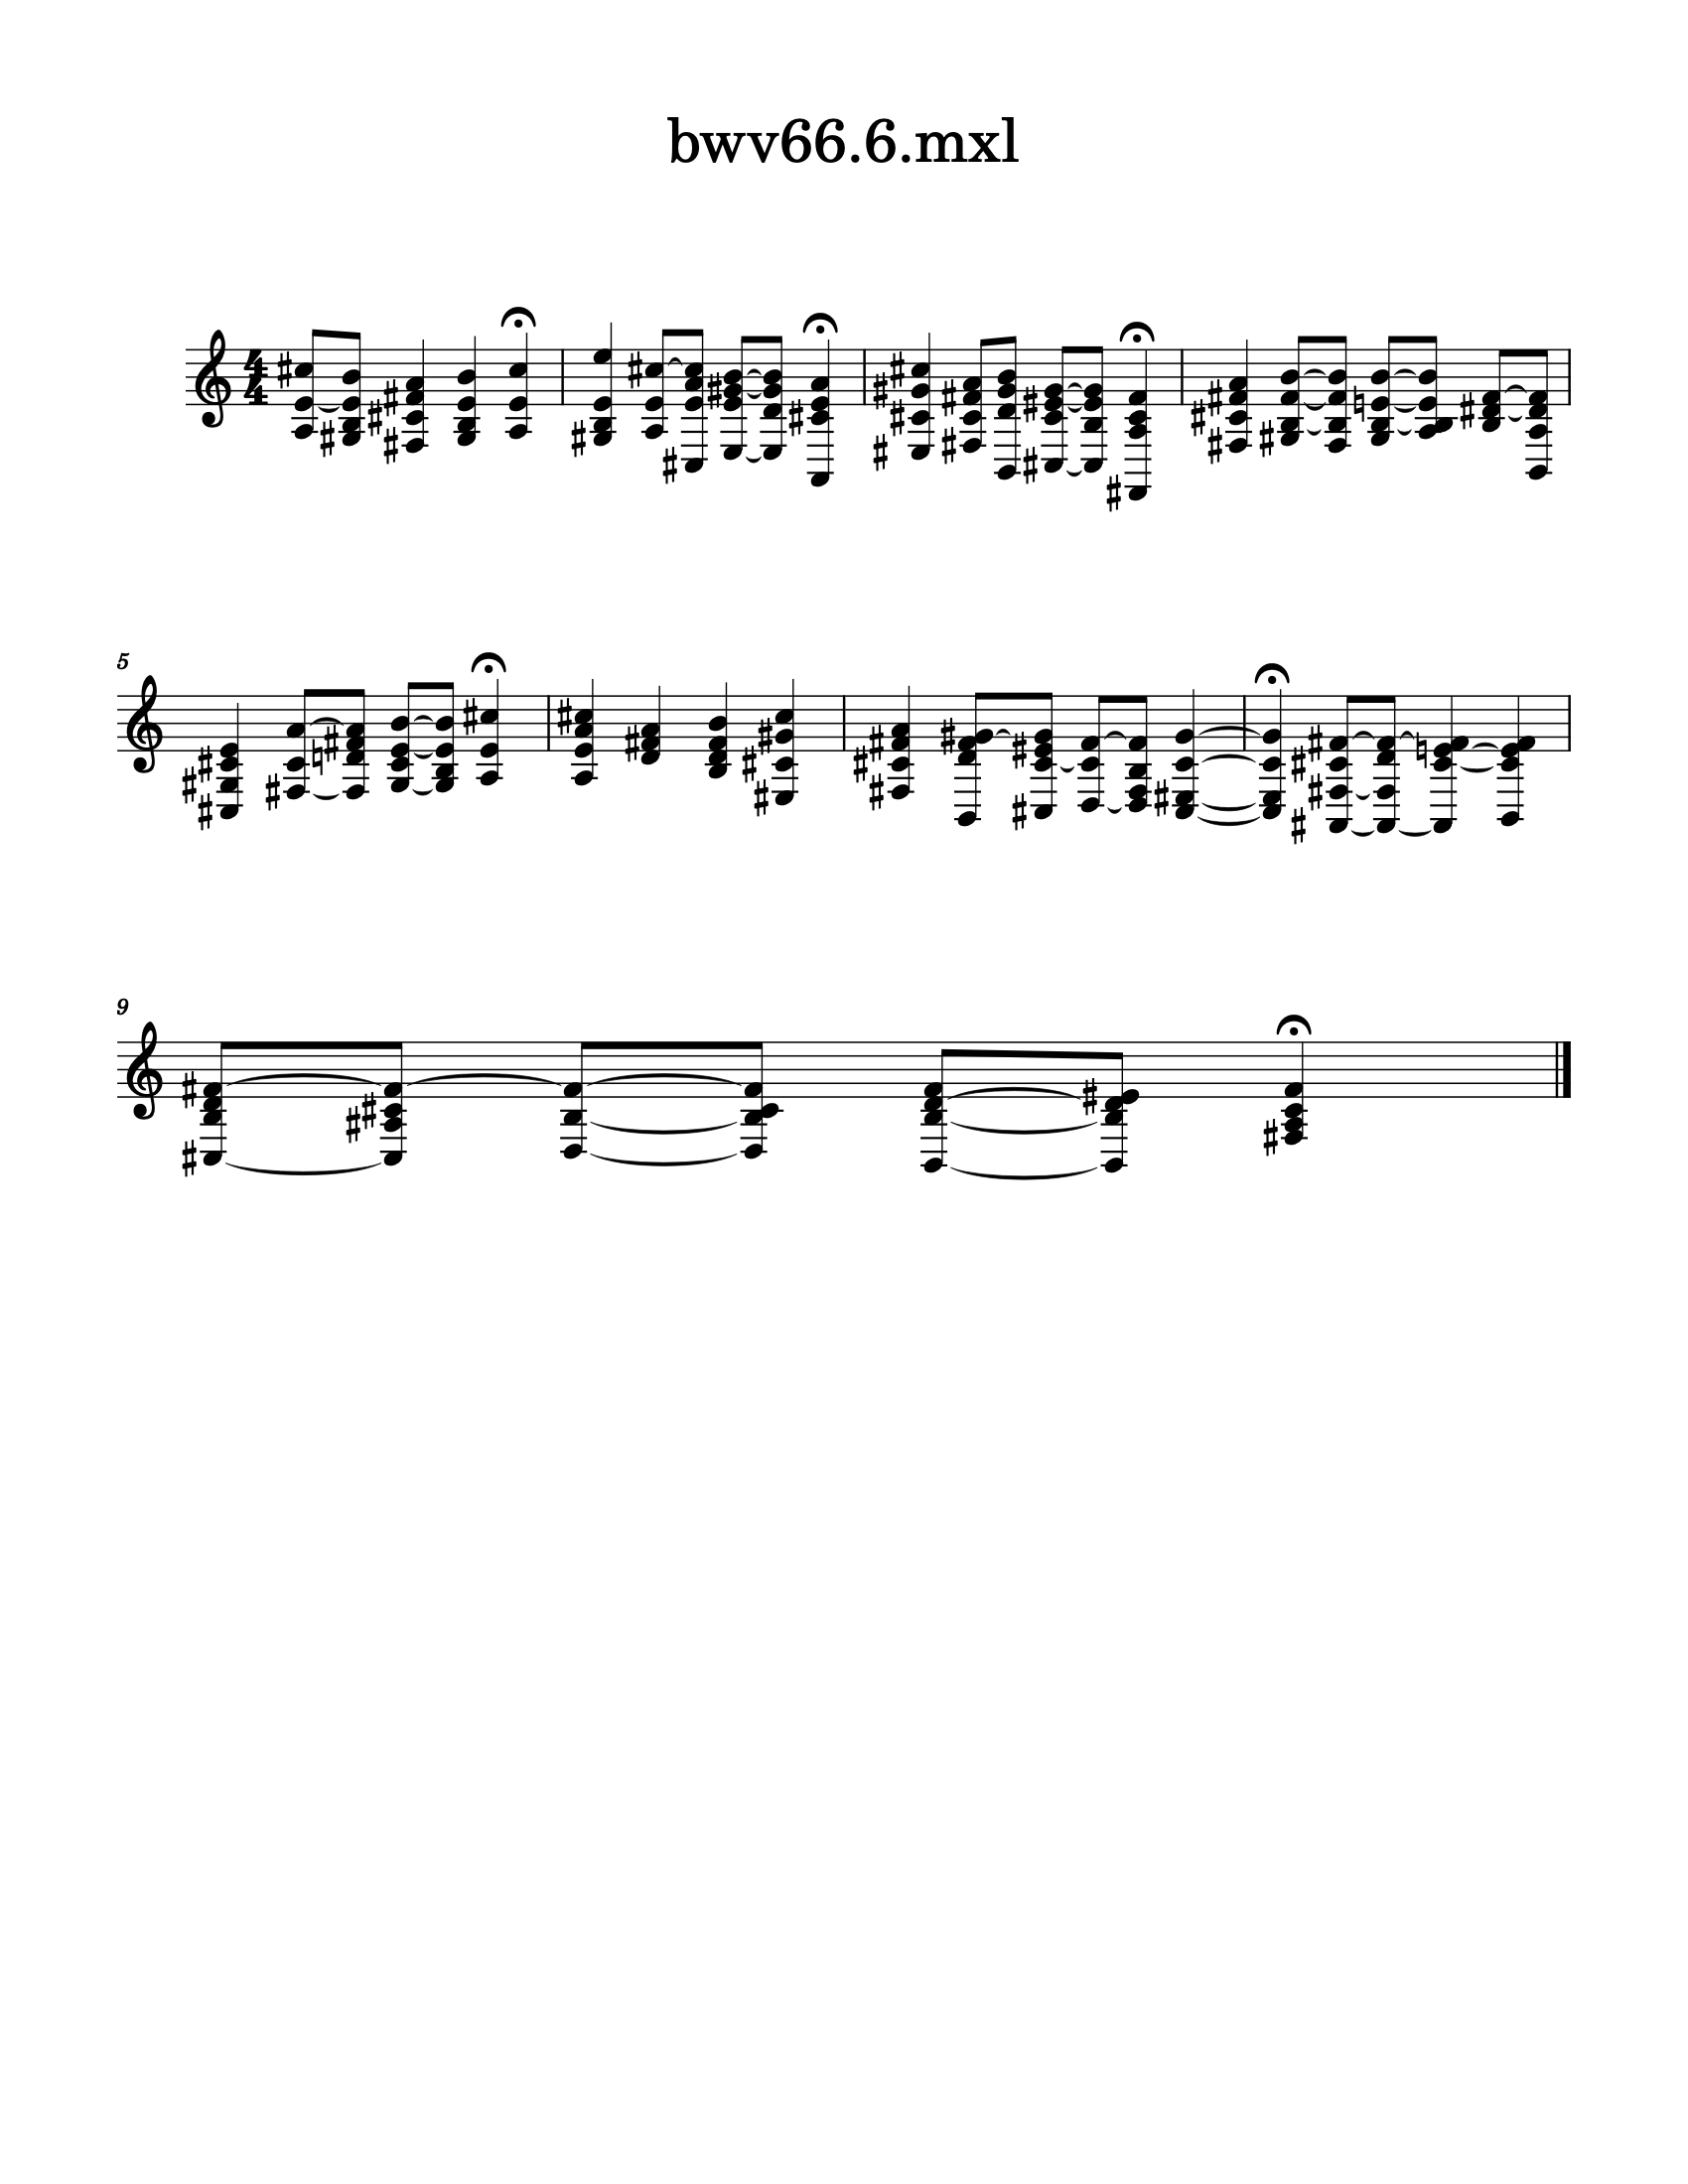

<music21.stream.Part displayPart>
0


In [51]:
print(len(sChords)) # First 2 are empty
print(sChords)
sFlat = sChords.flat
print(sFlat)
print(len(sFlat))
sFlat.show()
sOnlyChords = sFlat.getElementsByClass('Chord')
sOnlyChords
print(len(sOnlyChords))
sOnlyChords.show()
displayPart = stream.Part(id='displayPart')

12


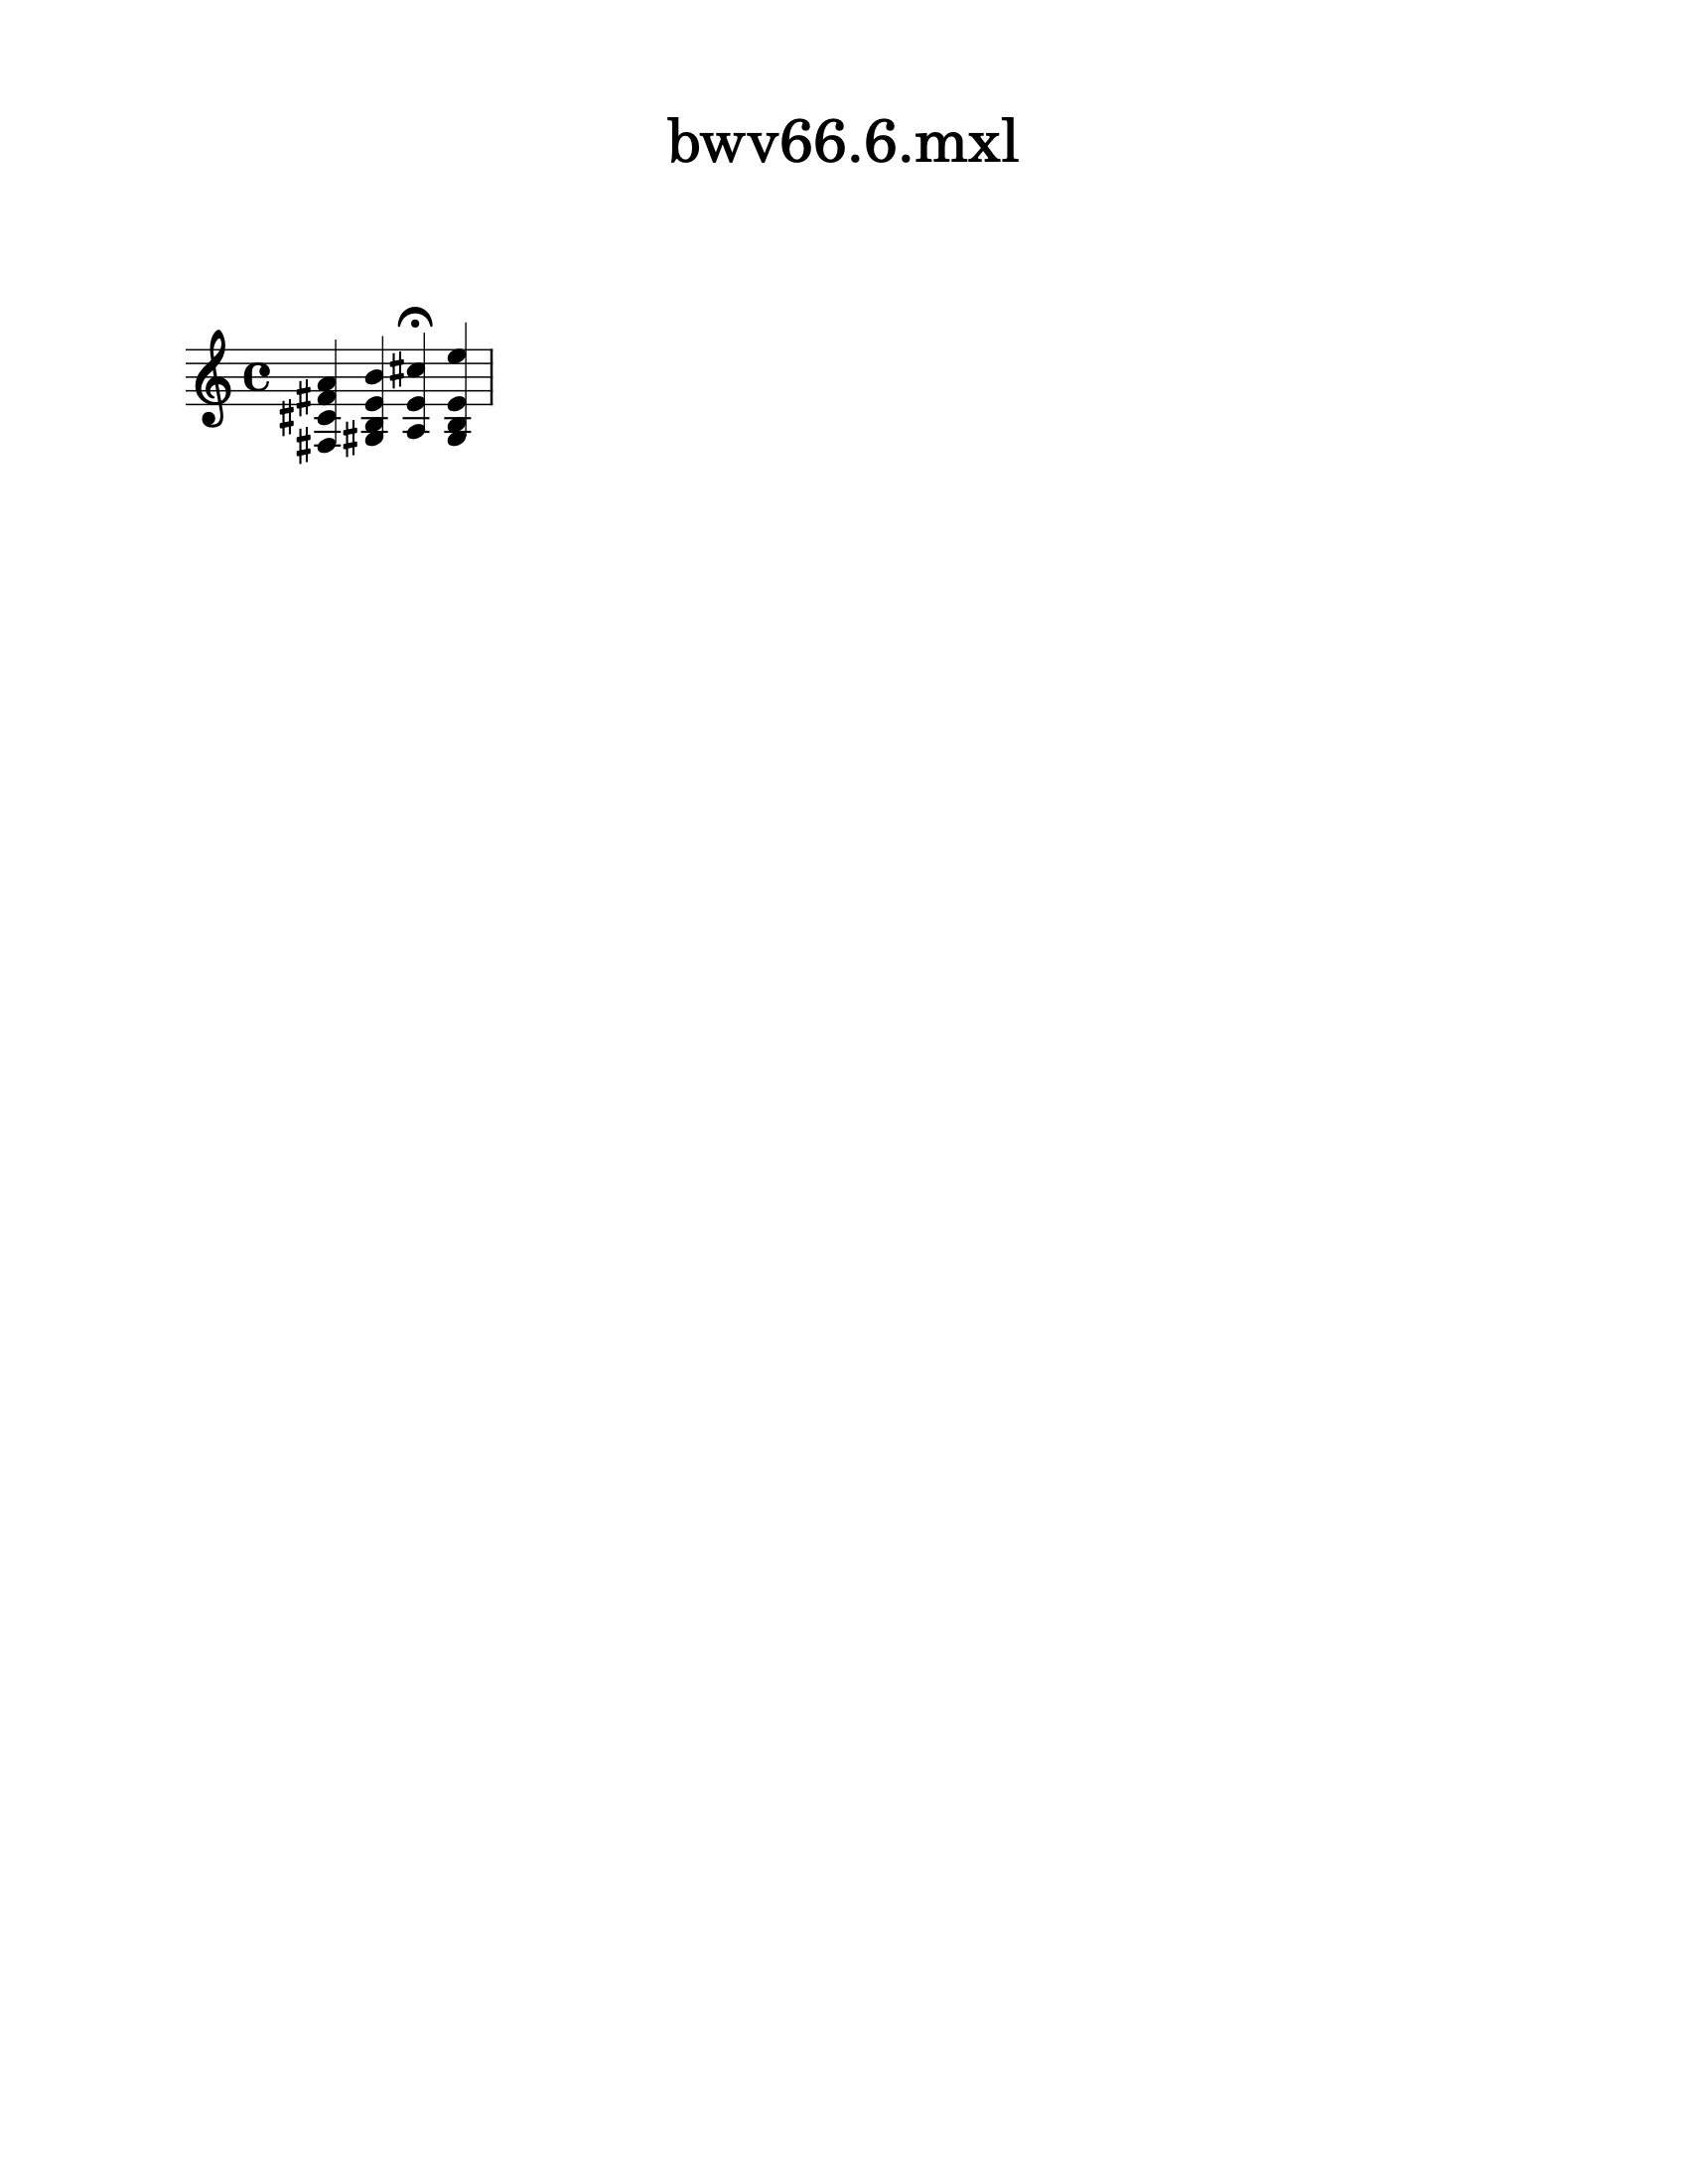

59


StreamException: attempting to access index 57 while elements is of size 0

In [52]:
print(len(sChords))
print(sChords[0])
sChords[3].show()
print(len(sFlat))
sFlat[57].show()


In [53]:
for i in range(0, len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    # do something with thisChord and nextChord here

In [54]:
def appendChordPairs(thisChord, nextChord):
    if ((thisChord.isTriad() is True or
            thisChord.isSeventh() is True) and
                thisChord.root().name == 'A'):
        closePositionThisChord = thisChord.closedPosition(forceOctave=4)
        closePositionNextChord = nextChord.closedPosition(forceOctave=4)

        m = stream.Measure()
        m.append(closePositionThisChord)
        m.append(closePositionNextChord)
        displayPart.append(m)

In [55]:
for i in range(len(sOnlyChords) - 1):
    thisChord = sOnlyChords[i]
    nextChord = sOnlyChords[i + 1]
    appendChordPairs(thisChord, nextChord)
len(displayPart)


7

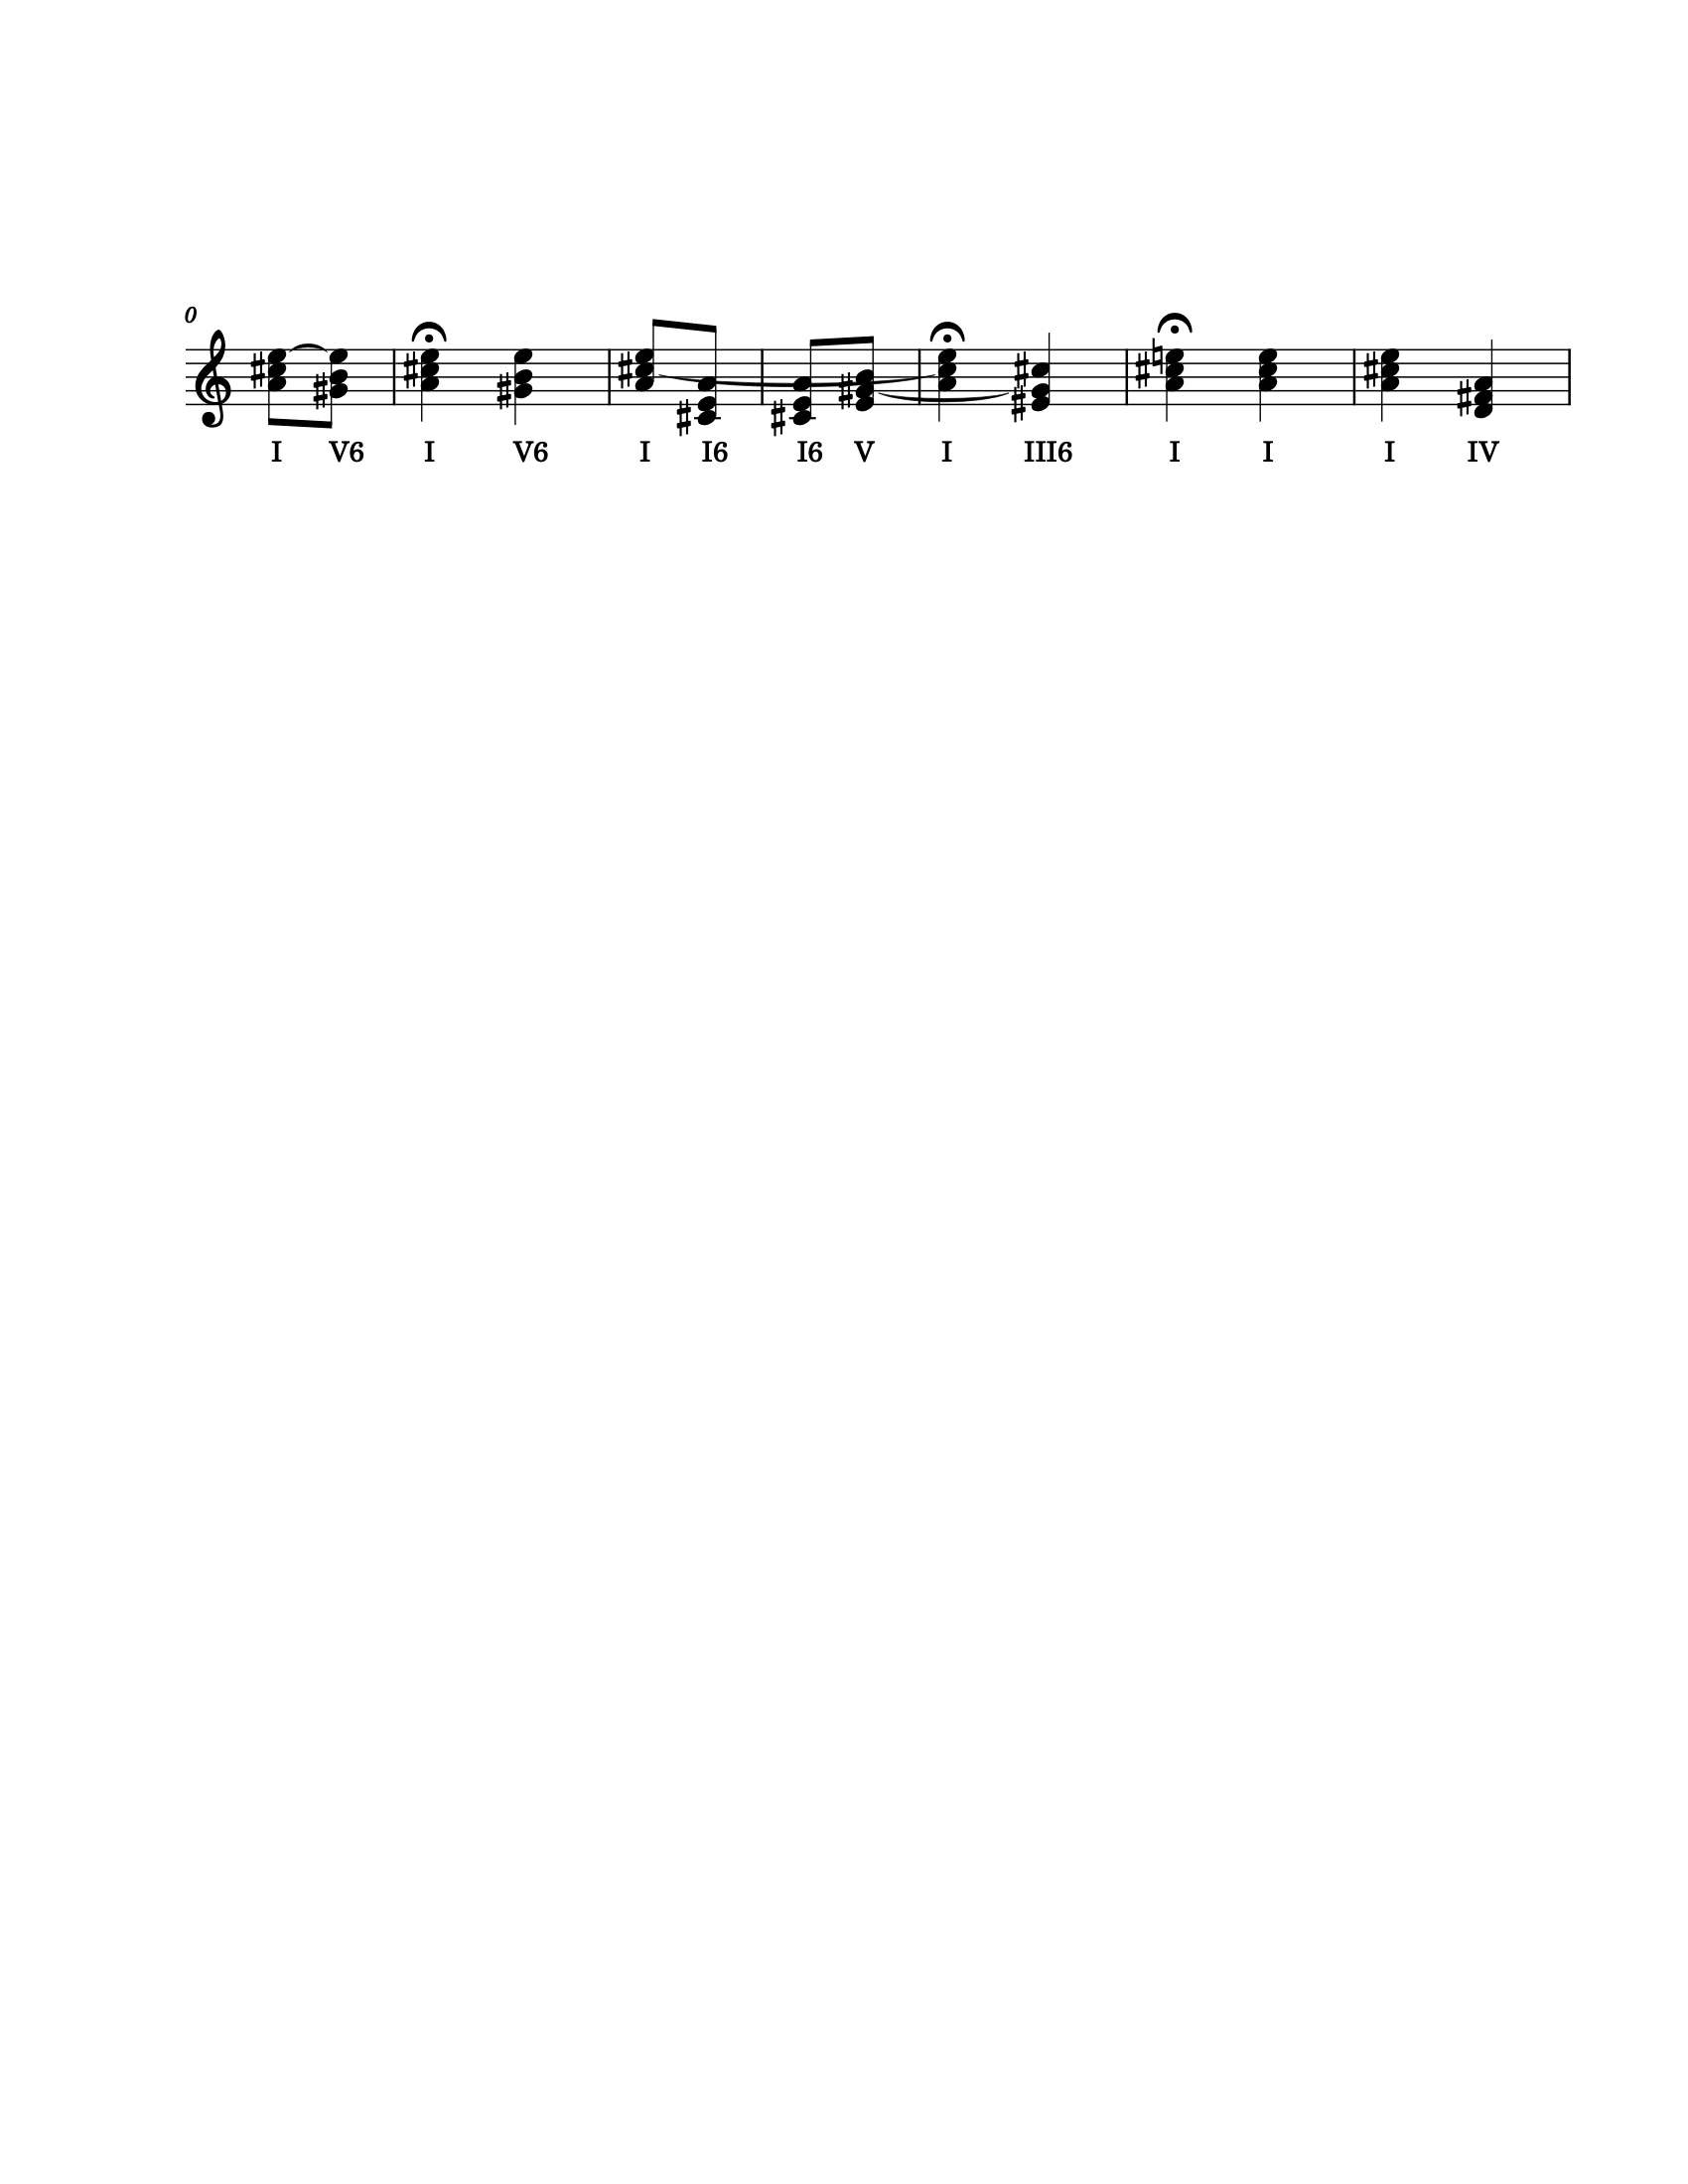

In [58]:

keyA = key.Key('A')
for c in displayPart.recurse().getElementsByClass('Chord'):
    rn = roman.romanNumeralFromChord(c, keyA)
    c.addLyric(str(rn.figure))
displayPart.show()


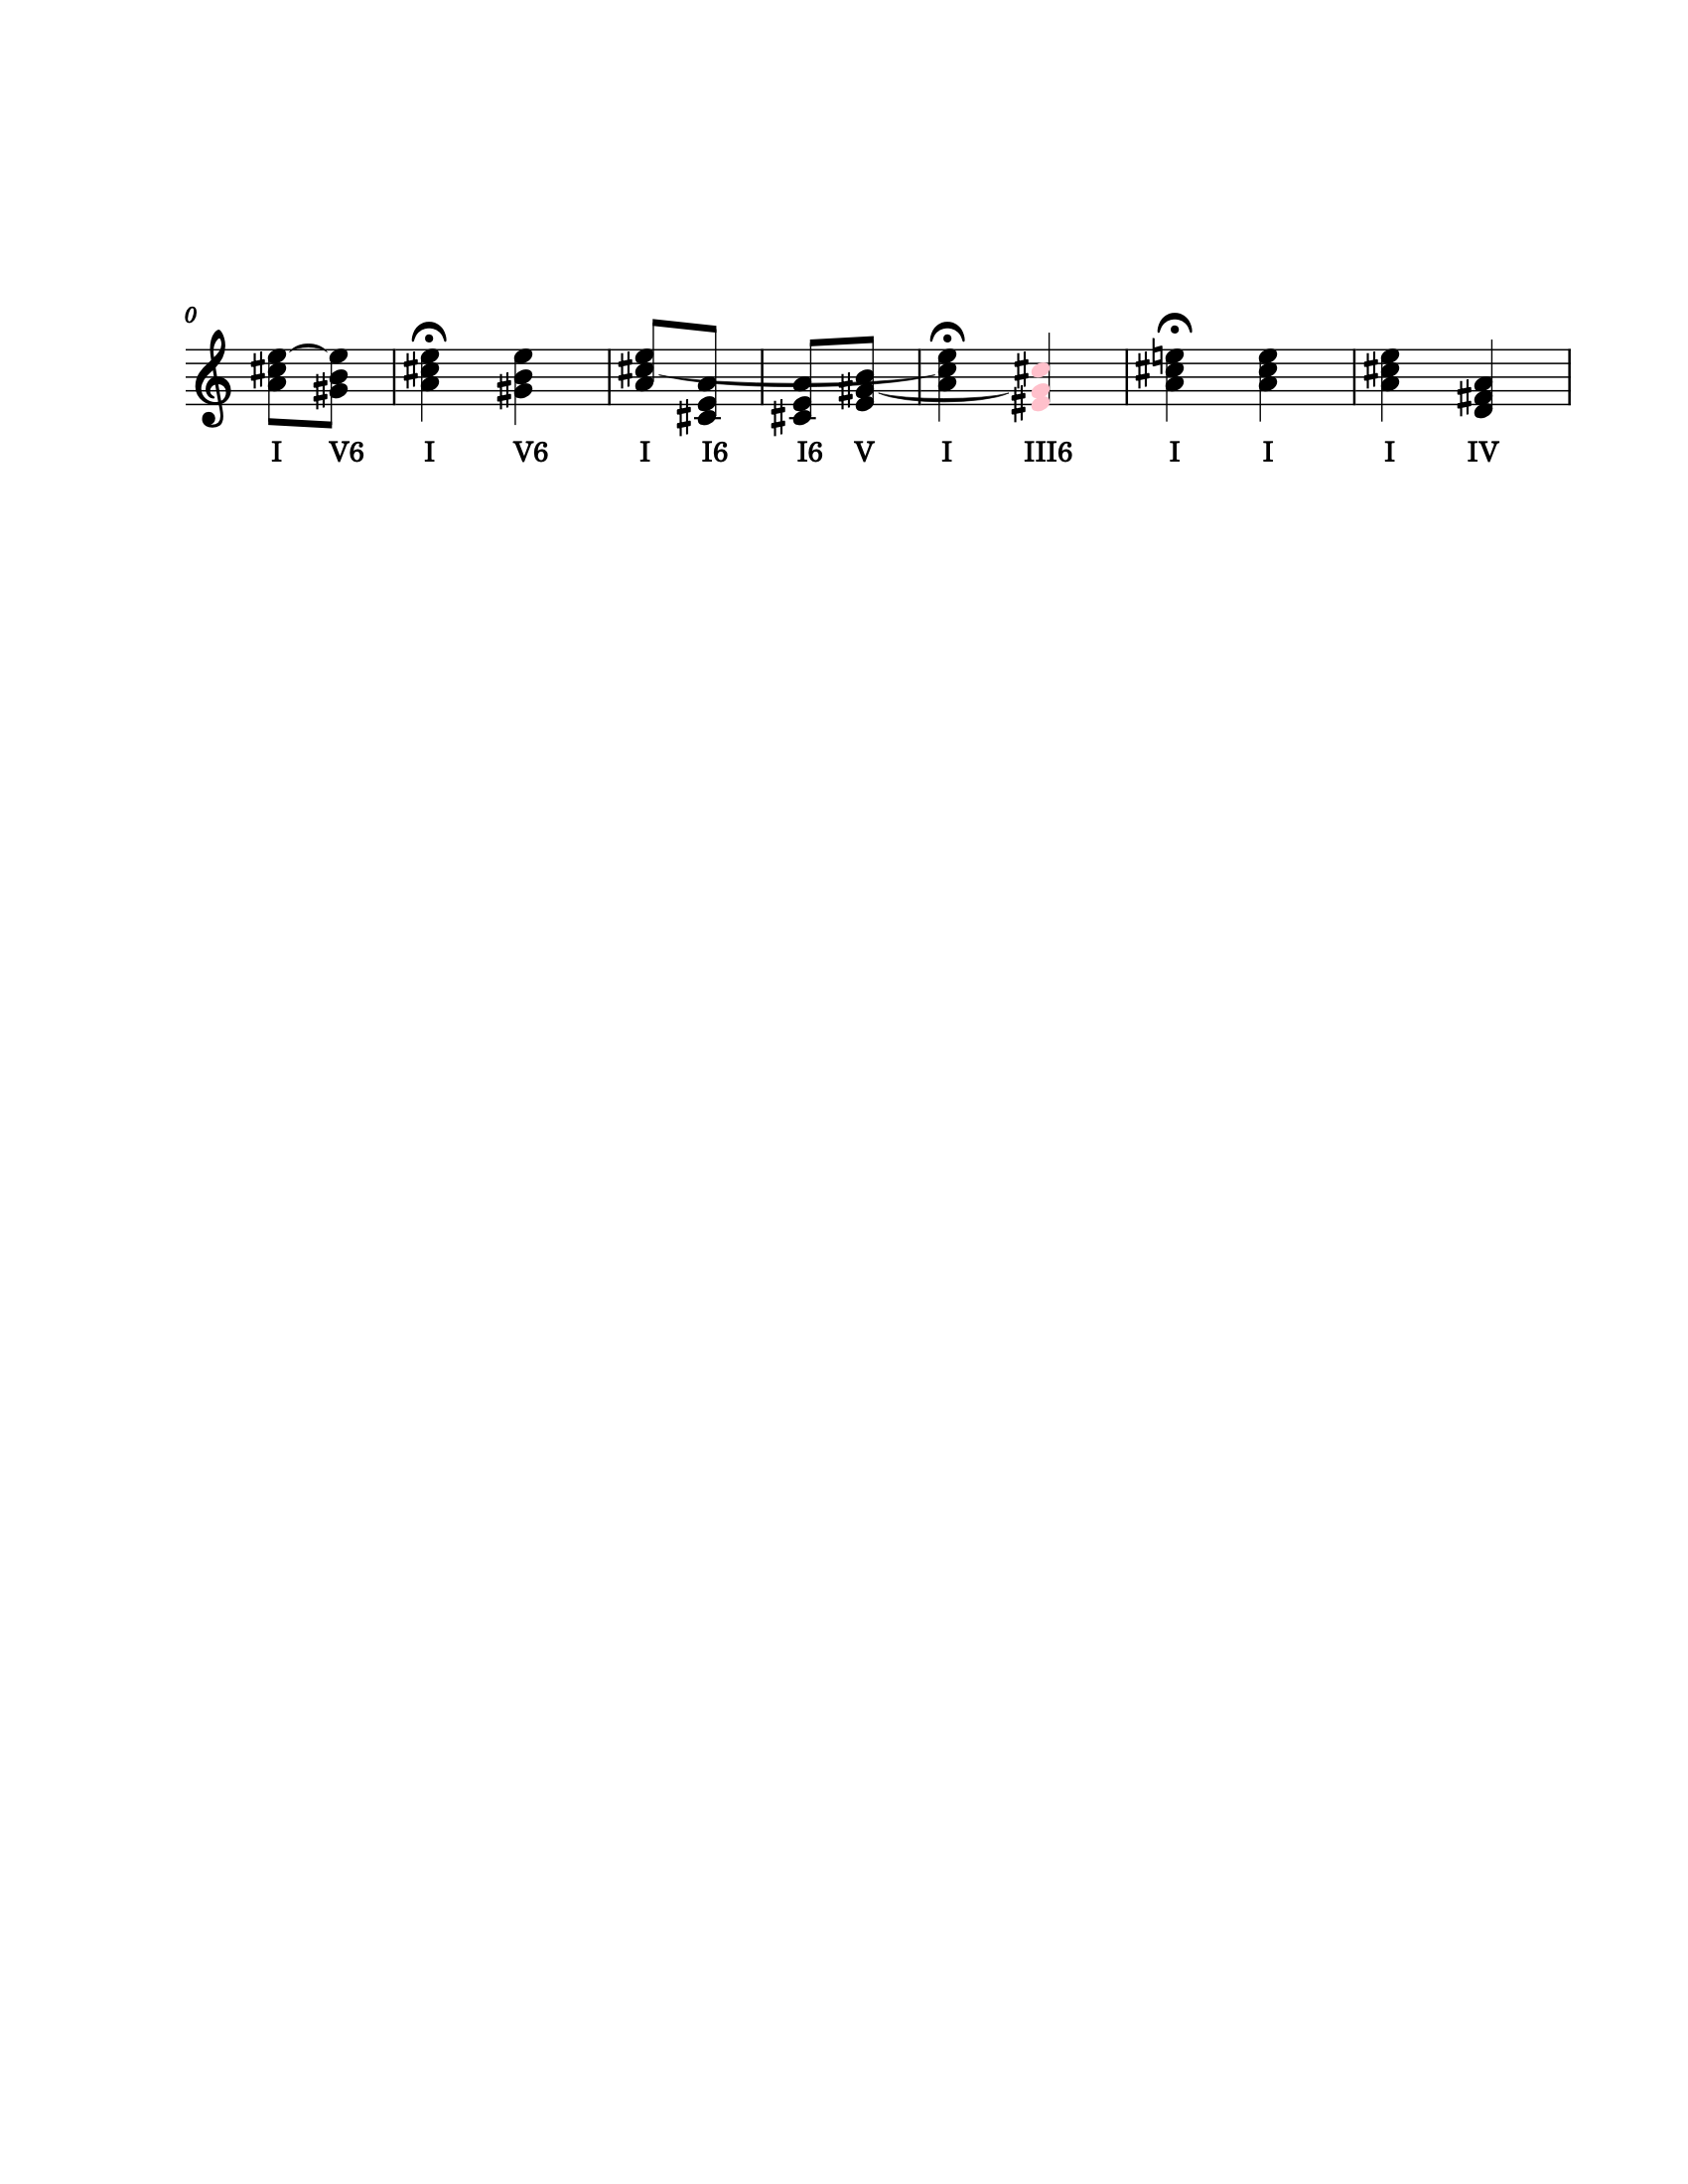

In [59]:
for c in displayPart.recurse().getElementsByClass('Chord'):
    if c.lyric == 'III6':
        c.style.color = 'pink'
        for x in c.derivation.chain():
            x.style.color = 'pink'

displayPart.show()

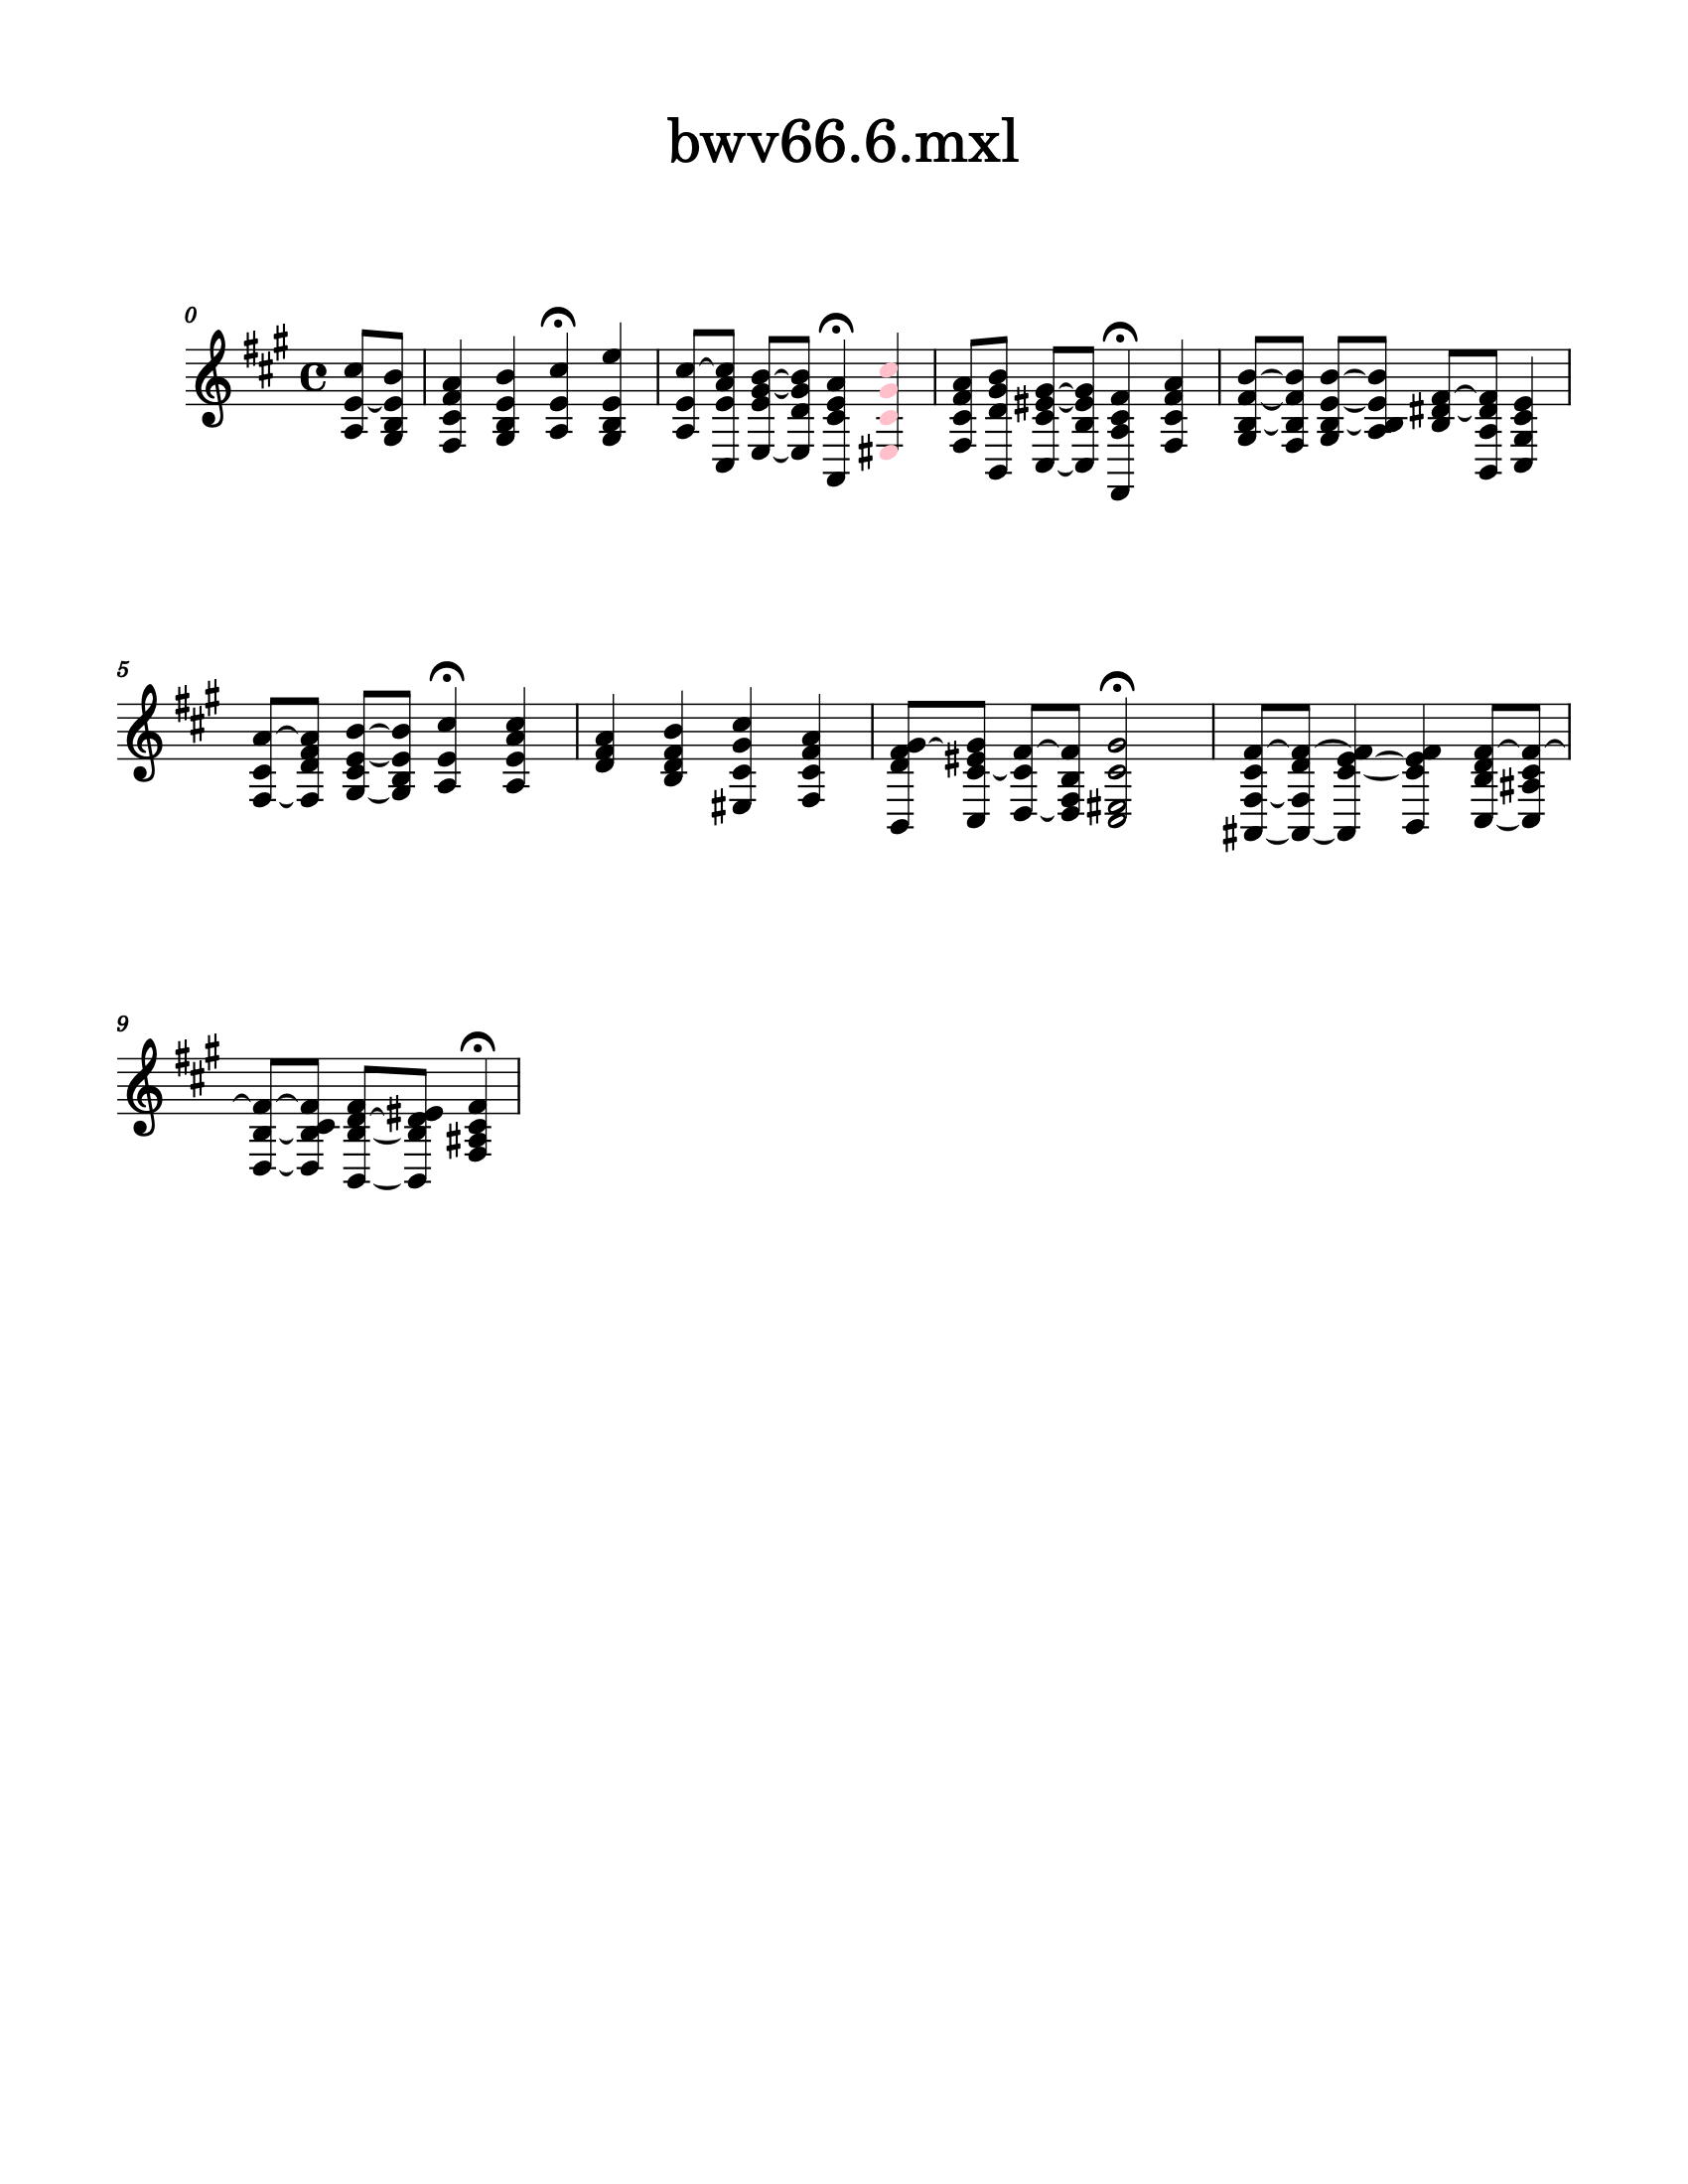

0 E major
1 E major
2 A major
3 f# minor
4 E major
5 A major
6 f# minor
7 C# major
8 F# major
9 b minor


In [60]:
sChords.show()
for m in sChords.getElementsByClass('Measure'):
    k = m.analyze('key')
    print(m.number, k)